<a href="https://colab.research.google.com/github/yanyan0812/yanyan0812/blob/main/Demand_Forecast_for_Bike_Sharing_in_Seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.14.0


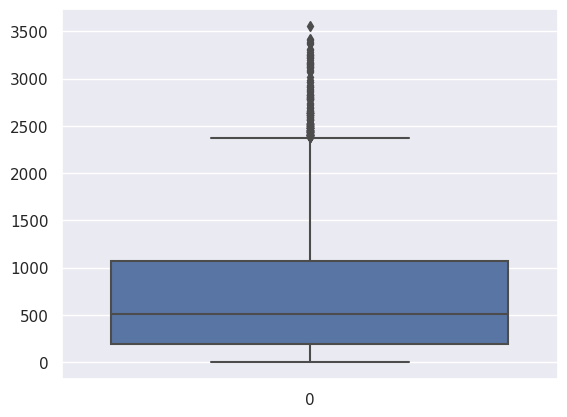

ADF Statistic: -6.946971
p-value: 0.000000


In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# Print TensorFlow version
print(tf.__version__)

# Load the dataset
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# Set the style for Seaborn and Matplotlib
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)

# Set the 'Date' column as the time index and specify the date format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.set_index('Date')

# Create time-related features if needed
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday

# Visualize the data to check for outliers
sns.boxplot(data=data['Rented Bike Count'])
plt.show()

# Perform a stationarity test of the time series
result = adfuller(data['Rented Bike Count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If not stationary, then difference the data
if result[1] > 0.05:
    data['Rented Bike Count'] = data['Rented Bike Count'].diff().dropna()

    # Test stationarity again
    result = adfuller(data['Rented Bike Count'].dropna())
    print('ADF Statistic after differencing: %f' % result[0])
    print('p-value after differencing: %f' % result[1])

Load Seoul bicycle rental data.
Convert dates to time series indexes and extract features such as year, month, day and day of the week from the dates.
Use box-and-line plots to check for outliers in the rental quantity data.
An ADF test was performed to determine if the time series data was smooth and the data was differenced if it was not smooth.
Finally, the ADF test was rerun to confirm the smoothness of the data.

In [ ]:
data.head()

<Axes: ylabel='Date'>

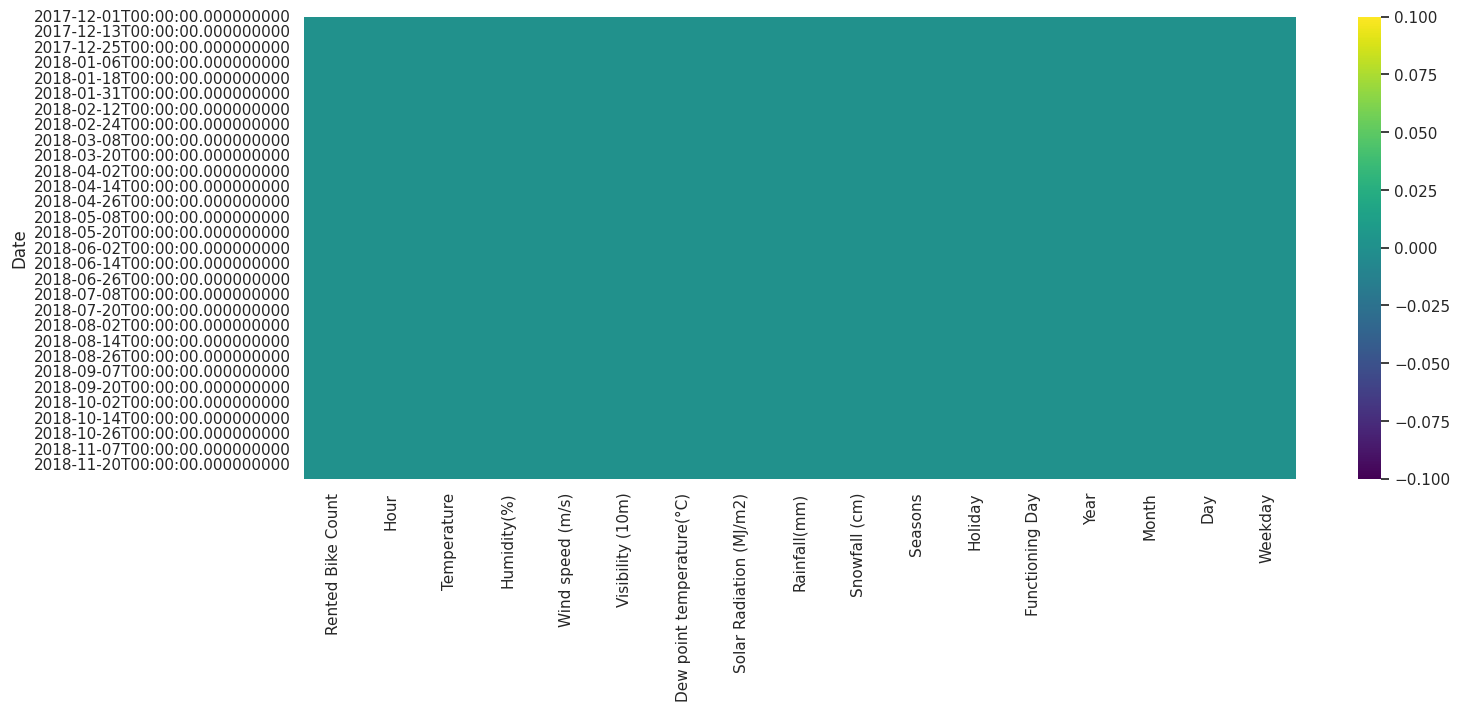

In [ ]:
plt.figure(figsize=(16,6))
data.isnull().sum()
sns.heatmap(data.isnull(),cmap="viridis")

The main purpose of this code is to visualise the distribution of missing values in the dataset, to help determine which feature columns contain missing values, and the distribution of missing values. This is an important step in data cleaning and preprocessing.

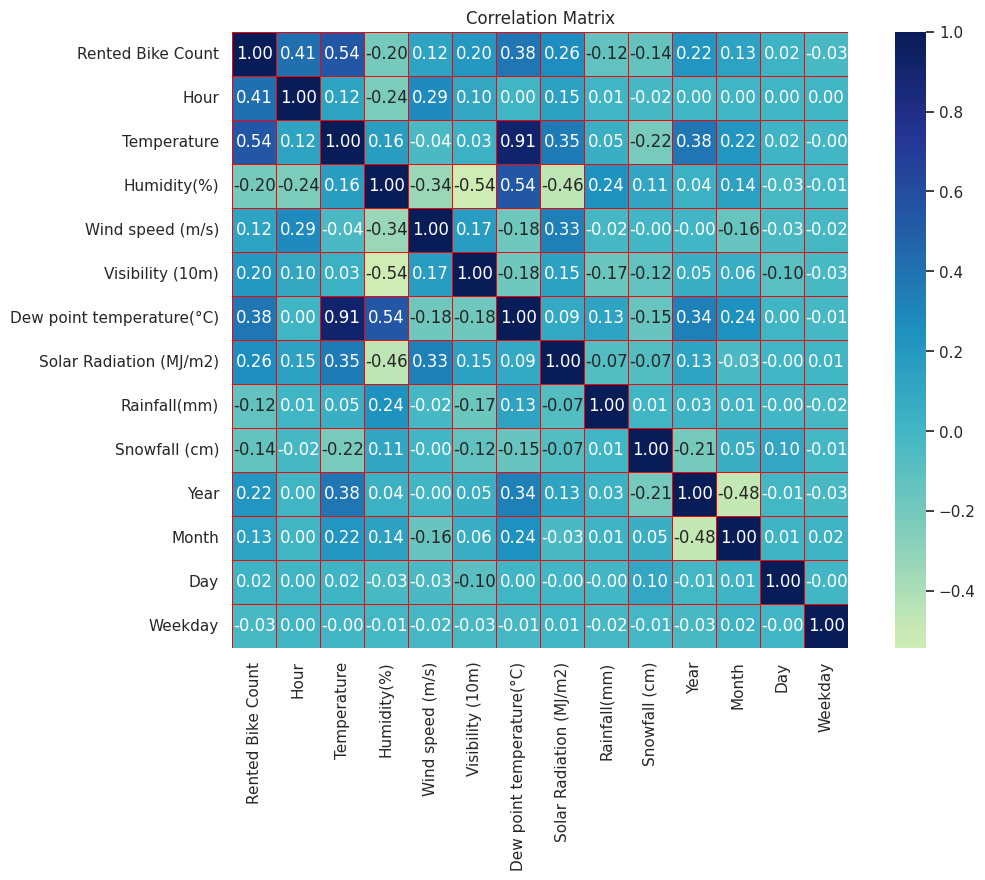

In [ ]:
# Calculate the correlation matrix and specify numeric_only=True
corr_matrix = data.corr(numeric_only=True)
# Use seaborn to draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", square=True, linewidths=.5, annot=True, fmt=".2f", center=0, linecolor="red")
plt.title("Correlation Matrix")
plt.show()

This code is used to compute the correlation coefficient matrix of numerical features in the dataset, and to draw a heatmap for visualisation using Seaborn's heatmap function. Correlation coefficients close to 1 or -1 indicate strong correlation, and values close to 0 indicate little correlation.

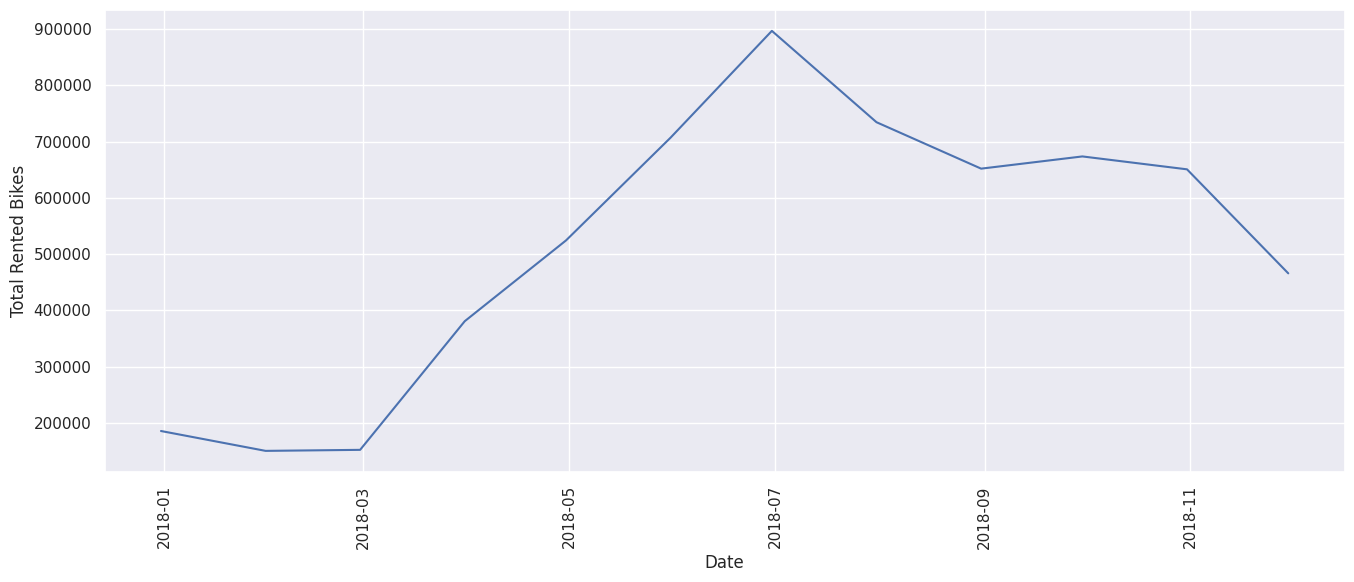

In [ ]:
# Resample 'Rented Bike Count' column by month and sum
df_by_month = data['Rented Bike Count'].resample("M").sum()

# Plot a line chart
plt.figure(figsize=(16,6))
sns.lineplot(x=df_by_month.index, y=df_by_month)
plt.xticks(rotation=90)
plt.ylabel('Total Rented Bikes')
plt.show()

The main purpose of this code is to resample the Rented Bike Count data on a monthly basis and plot a line graph showing the total number of bikes rented each month.

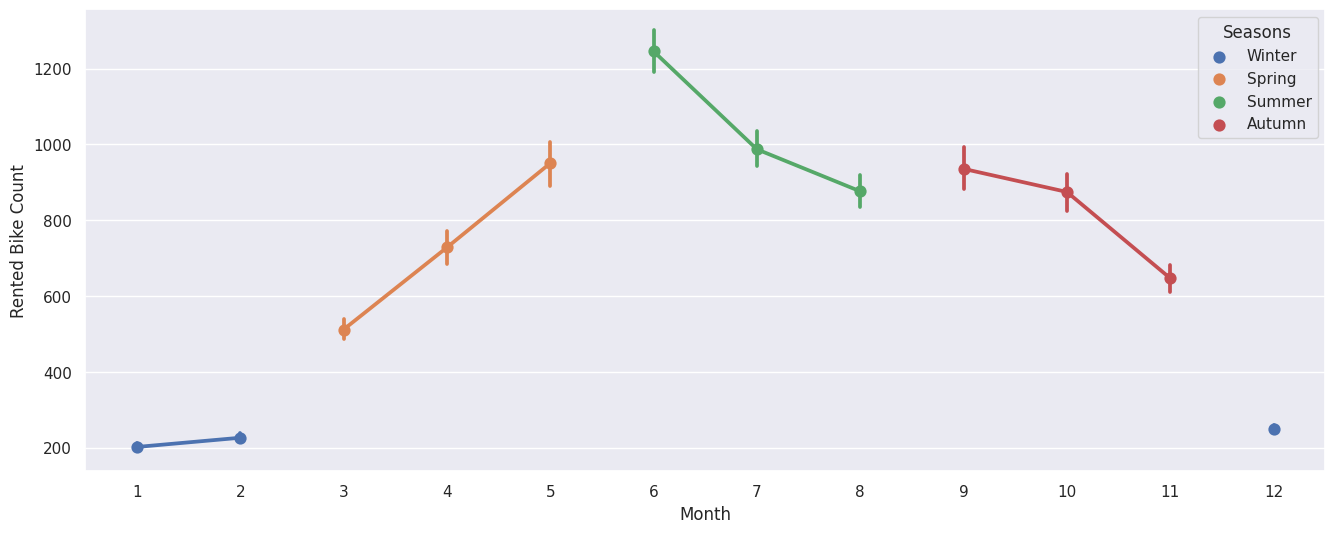

In [ ]:
# If your datetime data is in the index
data['Month'] = data.index.month

# Or if the datetime data is in a column named 'Date'
# data['Month'] = pd.to_datetime(data['Date']).dt.month

# Then create a point plot
plt.figure(figsize=(16, 6))
sns.pointplot(data=data, hue='Seasons', y='Rented Bike Count', x='Month')
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")
plt.show()

This code extracts month information from time-series data and uses a point plot to visualise the number of bicycles rented per month in different seasons, grouped by season, in order to analyse the impact of seasonal trends on the number of bicycles rented. Such an analysis will allow a better understanding of how the demand for rental bikes changes over the seasons.

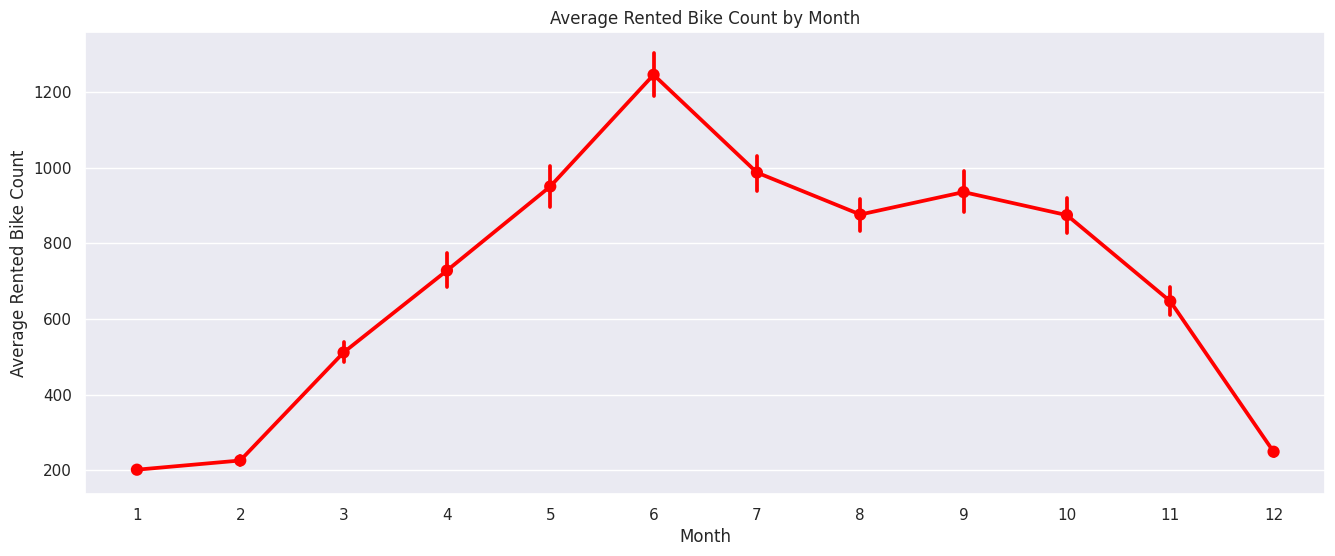

In [ ]:
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Format the date to match the format in your data

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Use Seaborn to create a point plot
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Month', y='Rented Bike Count', color="red")
plt.title("Average Rented Bike Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Rented Bike Count")
plt.show()

This code shows the variation in the number of rental bikes through a monthly dimension to help identify possible seasonal trends or patterns in the data. This visualisation allows us to visualise the difference in the number of bikes rented in different months and thus analyse seasonal changes in rental demand

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

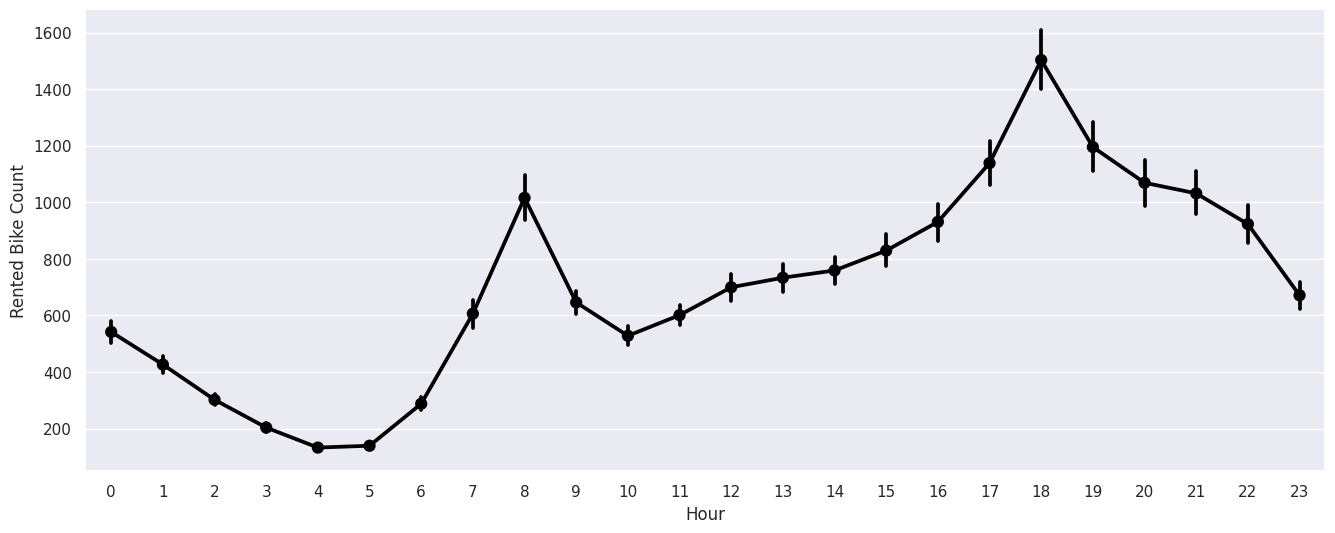

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', color="black")


This code uses a point plot to visualise the number of bikes rented per hour, and analyses the number of bikes rented during each hour of the day to understand which hours have higher rental demand and which have lower rental demand

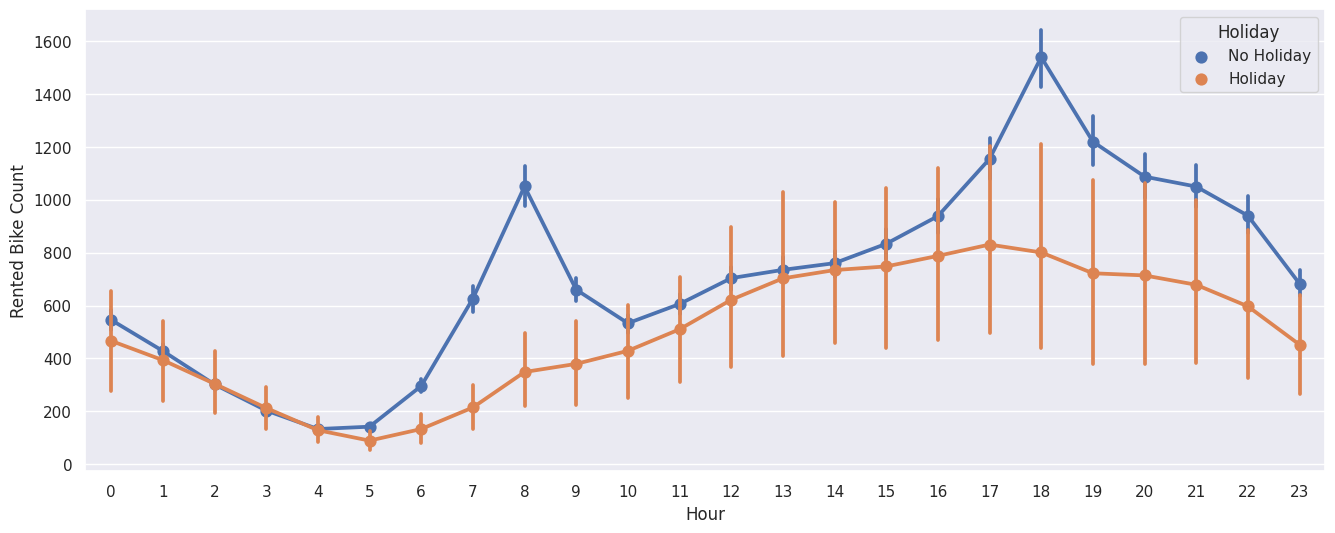

In [ ]:
# Assume your DataFrame is named data with columns named 'Hour', 'Rented Bike Count', and 'Holiday'
# Create a point plot with 'Holiday' as the hue
plt.figure(figsize=(16, 6))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

This code uses a point plot to show the number of bikes rented in each hour of the day, differentiated by whether it is a holiday or not, to give a more intuitive understanding of the impact of holidays on the number of bikes rented at different times of the day.

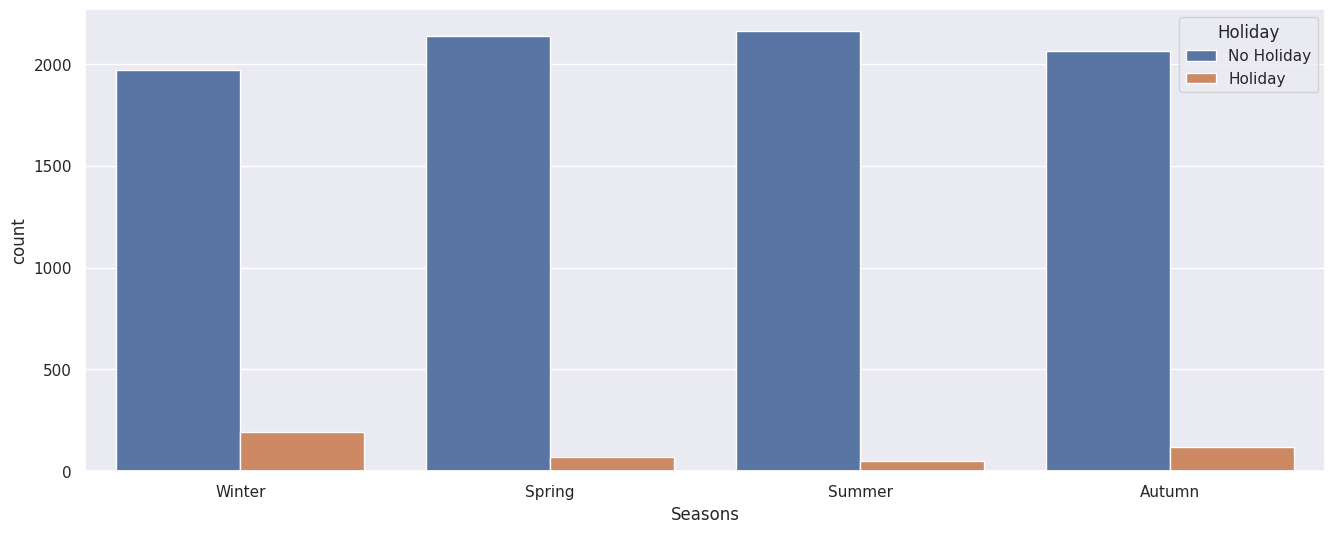

In [ ]:
# Create a count plot grouped by 'Seasons' and colored by 'Holiday'
plt.figure(figsize=(16,6))
sns.countplot(data=data, x='Seasons', hue='Holiday')
plt.show()


This code uses Seaborn's countplot function to draw a bar chart showing the number of bike rentals in the dataset for different seasons ("seasons"), differentiated according to whether or not they are holidays ("holidays"), in order to analyse the seasonal patterns in the dataset and compare the difference in the number of bike rentals between holidays and non-holidays in each season. This visualisation allows for an intuitive understanding of the impact of different seasons and holidays on the number of bike rentals


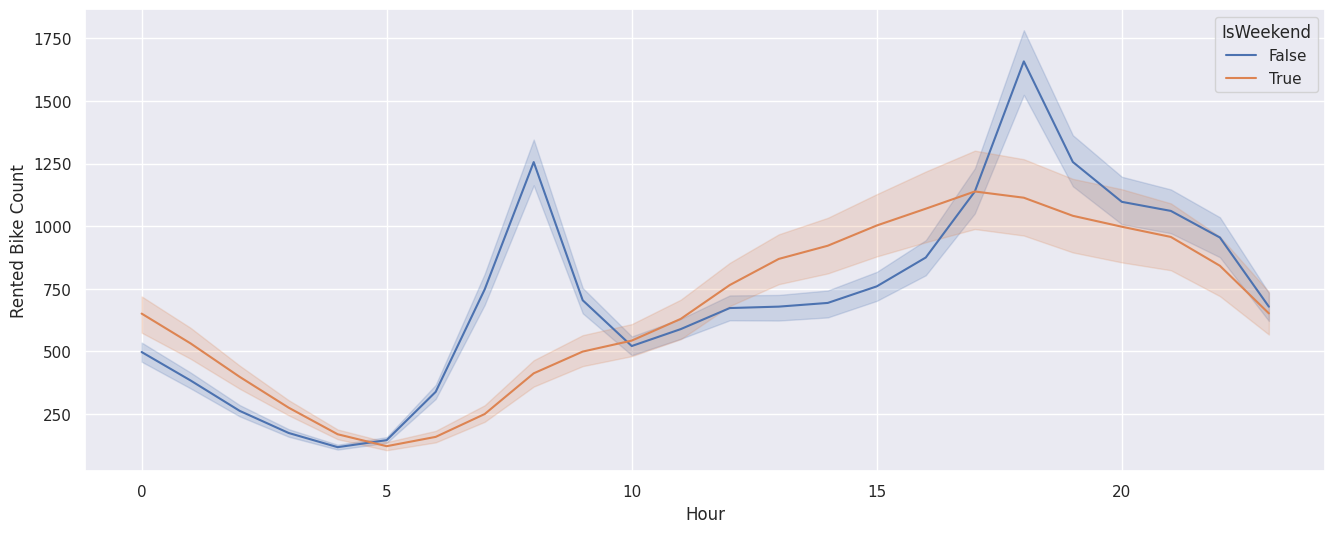

In [ ]:

data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')


data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.set_index('Date')


# Adding information about the day of the week
data['DayOfWeek'] = data.index.dayofweek
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: x >= 5)

# Plot a line chart showing 'Rented Bike Count' across hours and color by 'IsWeekend'
plt.figure(figsize=(16,6))
sns.lineplot(data=data, x='Hour', y='Rented Bike Count', hue='IsWeekend')
plt.show()

This code is mainly used to visualise the trend of the number of bike rentals as a function of the hour of the day, differentiated according to whether it is a weekend or not, with the addition of two new columns: 'DayOfWeek' (the day of the week) and 'IsWeekend' (whether it is a weekend or not).' DayOfWeek' column calculates the day of the week based on the date index (0 for Monday, 6 for Sunday), while 'IsWeekend' determines if it is a weekend (Saturday or Sunday) based on the value of the 'DayOfWeek' column.

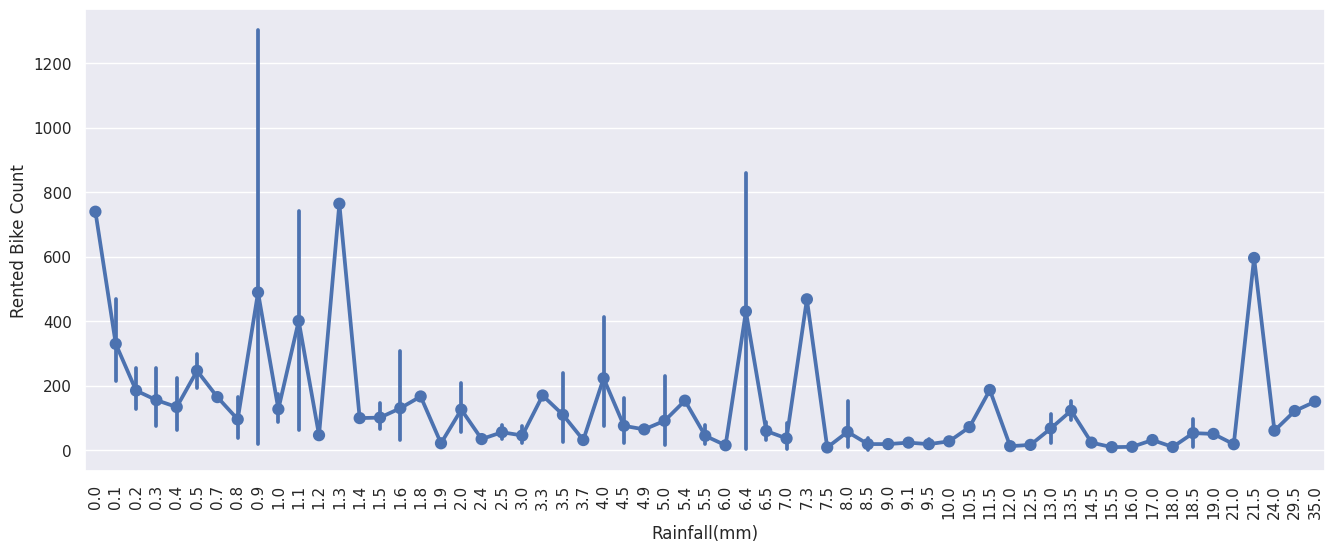

In [ ]:
# Create a point plot based on 'Rainfall(mm)' and 'Rented Bike Count'
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Rainfall(mm)', y='Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

Plot the points using Seaborn's pointplot function. Here the x-axis is the amount of rainfall ('Rainfall(mm)') and the y-axis is the number of rented bikes ('Rented Bike Count'). Each point in the dot plot represents the average number of rented bikes for a given level of rainfall. To understand the trend of the number of rented bikes under different rainfall levels and thus assess the impact of weather conditions on the demand for bike rentals.

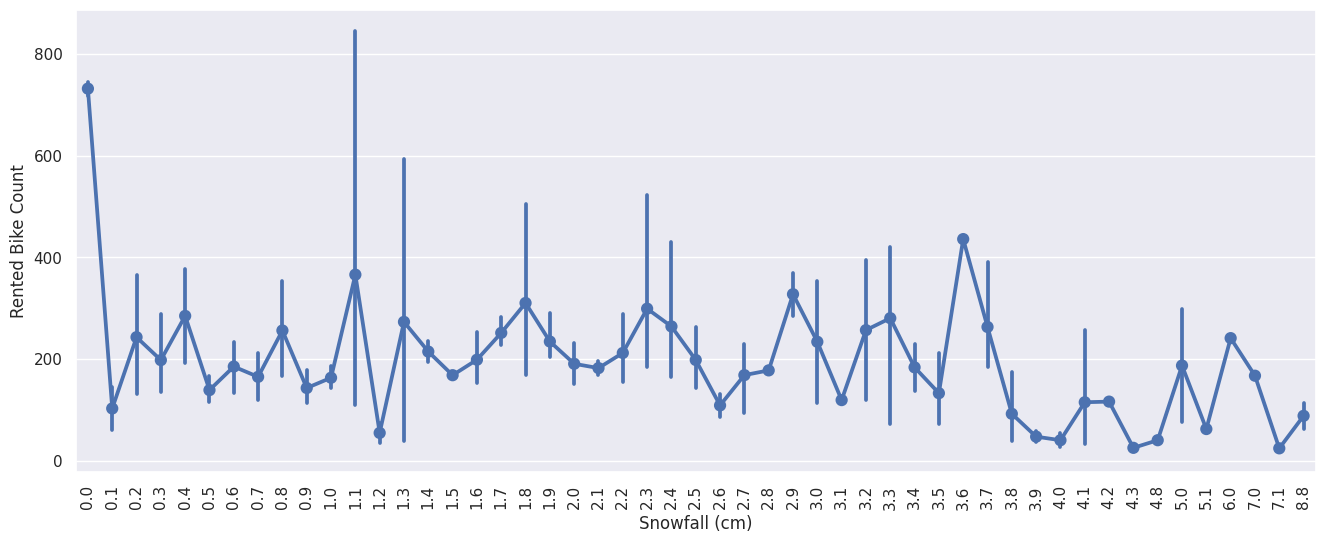

In [ ]:
# Create a point plot based on 'Snowfall (cm)' and 'Rented Bike Count'
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Snowfall (cm)', y='Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

This graph also looks at the effect of weather on the demand for shared bikes, this one shows the effect of snow

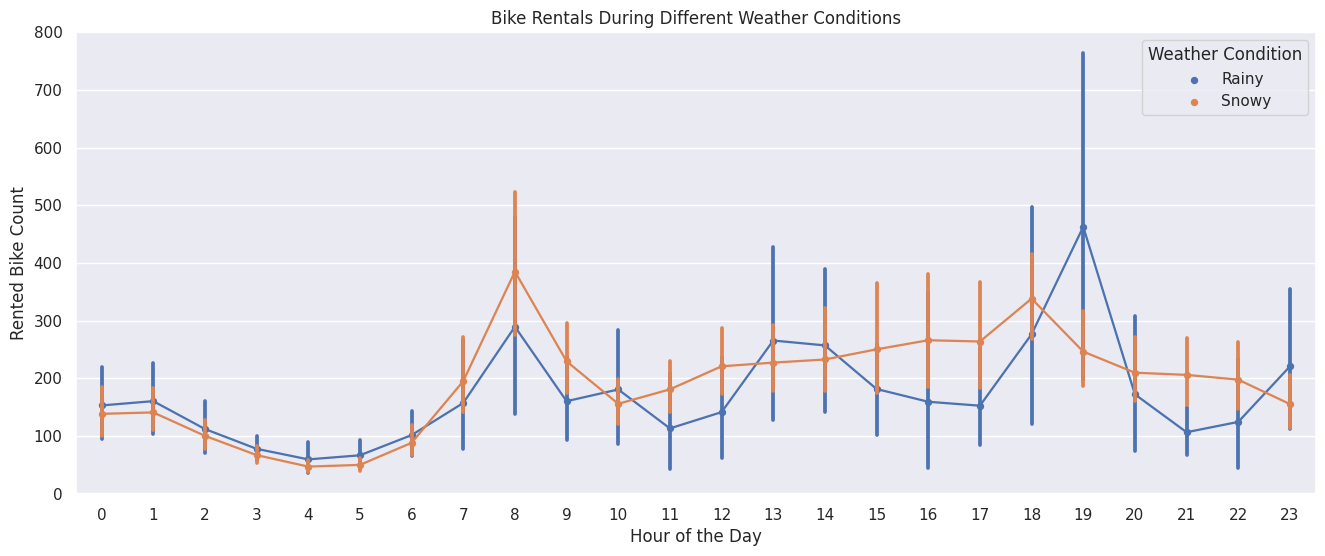

In [ ]:
# Load data and ensure proper encoding
data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

# Data preprocessing - converting 'Date' column to datetime format and setting it as index
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.set_index('Date')

# Create a new column to label weather conditions
data['Weather Condition'] = 'Clear'
data.loc[data['Rainfall(mm)'] > 0, 'Weather Condition'] = 'Rainy'
data.loc[data['Snowfall (cm)'] > 0, 'Weather Condition'] = 'Snowy'

# Filter data to include only rows where it's raining or snowing
weather_data = data[data['Weather Condition'] != 'Clear']

# Plot a chart showing bike rentals during different weather conditions
plt.figure(figsize=(16,6))
sns.pointplot(data=weather_data, x='Hour', y='Rented Bike Count', hue='Weather Condition', scale=0.6)
plt.title("Bike Rentals During Different Weather Conditions")
plt.xlabel("Hour of the Day")
plt.ylabel("Rented Bike Count")
plt.show()

This code helps to understand how weather affects rental behaviour by visualising how the number of bikes rented per hour varies throughout the day under different weather conditions

（1）Create a new column to identify the weather condition，add a new column 'Weather Condition' to the dataset with a default value of 'Clear'.If the value of the 'Rainfall (mm)' column is greater than 0, set the corresponding 'Weather Condition' to 'Rainy'. If the value of the 'Snowfall (cm)' column is greater than 0, set the corresponding 'Weather Condition' to 'Snowy'. （2）Filter data for specific weather conditions Filter data from the dataset to include only rainy and snowy conditions, excluding sunny days

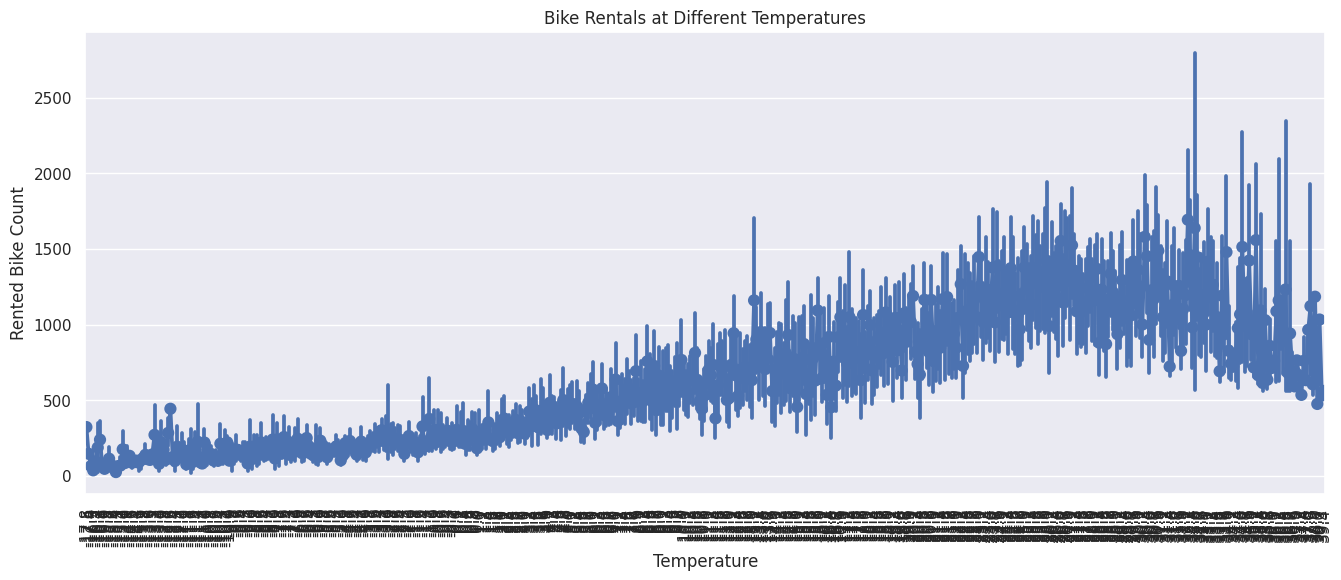

In [ ]:
# Use 'Temperature' as x-axis data for a point plot
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Temperature', y='Rented Bike Count')
plt.xticks(rotation=90)
plt.title("Bike Rentals at Different Temperatures")
plt.xlabel("Temperature")
plt.ylabel("Rented Bike Count")
plt.show()

The purpose of this code is to explore the effect of temperature on the number of bicycles rented. This visualisation allows for an intuitive understanding of how the demand for rental bikes changes under different temperature conditions, thus assessing the impact of weather conditions on rental behaviour. A point plot is drawn using Seaborn's pointplot function, where the x-axis is the temperature ('Temperature') and the y-axis is the number of rental bikes ('Rented Bike Count'). Each point in the pointplot represents the average number of rented bikes at a given temperature.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the data
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# Preprocess the data
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.1, random_state=0)

# Remove the 'Date' column
train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

# Convert the 'Functioning Day' column to numerical values
train['Functioning Day'] = train['Functioning Day'].map({'Yes': 1, 'No': 0})
test['Functioning Day'] = test['Functioning Day'].map({'Yes': 1, 'No': 0})

# Remove specified columns for feature engineering
columns_to_remove = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
train = train.drop(columns=columns_to_remove)
test = test.drop(columns=columns_to_remove)

# Normalize the data
scaler = MinMaxScaler()
num_colu = ['Temperature', 'Functioning Day']
train[num_colu] = scaler.fit_transform(train[num_colu].astype(np.float32))
test[num_colu] = scaler.transform(test[num_colu].astype(np.float32))

# Normalize the 'Rented Bike Count' column as well
cnt_scaler = MinMaxScaler()
train["Rented Bike Count"] = cnt_scaler.fit_transform(train[["Rented Bike Count"]].astype(np.float32))
test["Rented Bike Count"] = cnt_scaler.transform(test[["Rented Bike Count"]].astype(np.float32))

# Perform one-hot encoding on "Seasons" and "Holiday" columns
train = pd.get_dummies(train, columns=['Seasons', 'Holiday'], prefix=['Seasons', 'Holiday'])
test = pd.get_dummies(test, columns=['Seasons', 'Holiday'], prefix=['Seasons', 'Holiday'])

# Prepare time series data for the LSTM model
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

# Define the time steps for the LSTM model
time_steps = 3
# Prepare the training and test data
X_train, y_train = create_dataset(train, train["Rented Bike Count"], time_steps)
X_test, y_test = create_dataset(test, test["Rented Bike Count"], time_steps)

# Build the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer="adam", loss="mse")

# Train the model with GPU acceleration
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        shuffle=False
    )

# Evaluate the model by plotting the training and validation loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse the normalization to compare actual values with predicted ones
y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = cnt_scaler.inverse_transform(y_pred)

# Calculate performance metrics: Root Mean Squared Error (RMSE) and R-squared (R2) score
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
print("RMSE: {}\nR2 Score: {}".format(rmse, r2))

# Plot the actual vs predicted values for visual comparison
plt.figure(figsize=(16, 6))
plt.plot(y_test_inv.flatten(), label="Actual")
plt.plot(y_pred_inv.flatten(), label="Predicted", color="r")
plt.legend()
plt.show()

（1）Data Preprocessing:

The dataset is split into training and testing sets.
The 'Date' column is removed as it is not required.
The categorical values in the 'Functioning Day' column are converted to numerical form (1 for 'Yes', 0 for 'No').
Selected columns that may not be used for model training are dropped.
Numerical columns are standardized using min-max normalization.
（2）Feature Engineering:One-hot encoding is performed on the 'Seasons' and 'Holiday' columns.Building Time Series Dataset:Data is prepared for the Recurrent Neural Network (LSTM model) by creating sequences based on a given number of time steps.
（3）Building and Training the LSTM Model:
A Bidirectional LSTM network is constructed using Keras.
A Dropout layer is included to reduce overfitting.
A Dense layer with a Sigmoid activation function is used as the output layer.
The model is compiled with the Adam optimizer and Mean Squared Error loss function.
The model is trained in a GPU-accelerated environment, with a portion of the training data set aside for validation.
（4）Model Evaluation:
Training and validation loss over epochs are plotted to assess model performance during training.
The model makes predictions on the test set.
Normalized predicted and actual values are transformed back to their original scale for comparison.
Root Mean Squared Error (RMSE) and Coefficient of Determination (R²) of the model's predictions are calculated and output.
（5）Visualization of Results:

A line chart is plotted to compare actual values with model predictions, providing a visual representation of the model's accuracy in predictions.

In [ ]:
pred = model.predict(X_test)

y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
pred_inv = cnt_scaler.inverse_transform(pred)

plt.figure(figsize=(16,6))
plt.plot(y_test_inv.flatten(),marker=".",label="actual")
plt.plot(pred_inv.flatten(),marker=".",label="prediction",color="r")


